##### Welcome to my second Python analysis!

# Introduction

#### Objectives of the study:
The primary objective of this study is to comprehend employee attrition at IBM, one of the world's largest and most significant companies. The main idea here is to understand how each variable in the dataset can influence attrition. Through this analysis, I aim to generate insights and explore possible solutions.


#### Dataset:

The dataset used in this study can be found on Kaggle.com, one of the leading websites in the field of Data Science and Machine Learning.

Dataset Link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


####  What is attrition?

Firstly, it is important to comprehend what Attrition is about. According to AIHR, Attrition is when an "employee leaves an organization for any reason and is not replaced for a long time, or not ever. It often results in a decrease in the size of an organization’s or department’s workforce because positions aren’t refilled when employees leave". Besides that, this dynamic can happen in the whole company or just in specific departments or roles.

####  Which factors influence attrition?

In general, there are multiple factors that can influence the departure of employees:

- Dissatisfaction with the pay
- Lack of career development
- Dissatisfaction with the work environment, people, work-life balance, or with their role.
- Relocating to another sector or leaving for another company
- Retirement

In this study, we will analyze deeply the different factors that can influence.

#### The Calculation of the Attrition Rate

The Attrition Rate is the KPI used to analyze attrition within a company. The usual formula for calculating the rate is as follows, according to Investopedia:

- Attrition rate = number of departures/average number of employees x 100

Normally, the formula takes into consideration an average number of employees in each year. For this project, since the database does not have information related to the year each employee left the company, I will consider the total number of people, not the average number of employees:

- Attrition rate = number of departures/total number of employees x 100

## 1. Importing libraries and reading CSV

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate

# set options

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# defining graph style for plt

plt.style.use("ggplot")

# defining graphs parameters

mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# reading the csv

data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## 2. Data Cleaning

In [54]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [55]:
# creating descriptions for each column

col = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

descriptions = [
    """Age of each employee""",
    """The employee has left IBM?""",
    """How often the employee travels""",
    """Daily salary rate""",
    """Department where the employee works""",
    """Distance from work in miles""",
    """Level of education""",
    """Field of study""",
    """Count for the employee""",
    """ID for each employee""",
    """Employee's level of satisfaction with the work environment""",
    """Gender of the employee""",
    """Hourly rate for the employee""",
    """Employee's level of involvement in their job""",
    """Employee's level within the company""",
    """Role of the employee at IBM""",
    """Employee's level of satisfaction with their job""",
    """Employee's marital status""",
    """Employee's monthly income""",
    """Monthly rate of salary""",
    """Number of companies the employee has worked for""",
    """Whether the employee is over 18 years old""",
    """Whether employees work overtime""",
    """Percentage increase in salary""",
    """Employee's performance rating""",
    """Employee's satisfaction with their work relationships""",
    """Standard working hours""",
    """Employee's stock option level""",
    """Total number of years that the employee has worked""",
    """Number of times the employee received training last year""",
    """Employee's perception of work-life balance""",
    """Number of years the employee has spent at the company""",
    """Number of years the employee has spent in their current role""",
    """Number of years since the employee's last promotion""",
    """Number of years the employee has been with their current manager"""
]

columns_descriptions = pd.DataFrame({"Columns":col, "Descriptions":descriptions})
columns_descriptions

,Columns,Descriptions
0,Age,Age of each employee
1,Attrition,The employee has left IBM?
2,BusinessTravel,How often the employee travels
3,DailyRate,Daily salary rate
4,Department,Department where the employee works
5,DistanceFromHome,Distance from work in miles
6,Education,Level of education
7,EducationField,Field of study
8,EmployeeCount,Count for the employee
9,EmployeeNumber,ID for each employee


In [56]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 1470 rows and 35 columns


In [57]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [58]:
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerics = data.select_dtypes(include=num)

non_numerics = data.select_dtypes(exclude=num)

print(f"The dataset has {numerics.shape[1]} numerical columns and {non_numerics.shape[1]} non-numerical columns.")

The dataset has 26 numerical columns and 9 non-numerical columns.


#### Visualizing duplicated values

In [59]:
duplicated = data.duplicated().sum()

if duplicated > 0:
    print(f"There are {duplicated} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")


No duplicated rows found in the dataset.


#### Visualizing missing values

In [60]:
# percent of missing values

cel = np.product(data.shape)
missing = data.isnull().sum()

percent=(missing/cel)*100

print("Percent of missing values vs Columns")

print(tabulate(percent.reset_index(), headers=['Column', 'Percent'], tablefmt="pipe"))

Percent of missing values vs Columns
|    | Column                   |   Percent |
|---:|:-------------------------|----------:|
|  0 | Age                      |         0 |
|  1 | Attrition                |         0 |
|  2 | BusinessTravel           |         0 |
|  3 | DailyRate                |         0 |
|  4 | Department               |         0 |
|  5 | DistanceFromHome         |         0 |
|  6 | Education                |         0 |
|  7 | EducationField           |         0 |
|  8 | EmployeeCount            |         0 |
|  9 | EmployeeNumber           |         0 |
| 10 | EnvironmentSatisfaction  |         0 |
| 11 | Gender                   |         0 |
| 12 | HourlyRate               |         0 |
| 13 | JobInvolvement           |         0 |
| 14 | JobLevel                 |         0 |
| 15 | JobRole                  |         0 |
| 16 | JobSatisfaction          |         0 |
| 17 | MaritalStatus            |         0 |
| 18 | MonthlyIncome            |         0

- The dataset does not have missing values.

#### It is interesting to rename column value labels according to the provided description.


In [61]:
# using loop to replace

mapping = {
    'Education': {1:"Below College", 2:"College", 3:"Bachelor", 4:"Master", 5: "Doctor"},
    'EnvironmentSatisfaction': {1:"Low", 2:"Medium",3:"High",4:"Very High"},
    'JobInvolvement':{1:"Low", 2:"Medium",3:"High",4:"Very High"},
    'JobSatisfaction':{1:"Low", 2:"Medium",3:"High",4:"Very High"},
    'PerformanceRating':{1:"Low", 2:"Good",3:"Excellent",4:"Outstanding"},
    'RelationshipSatisfaction':{1:"Low", 2:"Medium",3:"High",4:"Very High"},
    'WorkLifeBalance':{1:'Bad',2:'Good', 3:'Better', 4:'Best'},
    'JobLevel':{1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level", 5:"Executive Level"}}

for column, column_mapping in mapping.items():
    if column in data:
        data[column] = data[column].replace(column_mapping)

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,Very High,Junior Level,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,Excellent,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,Medium,Mid Level,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,Excellent,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,Very High,Junior Level,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Outstanding,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,Medium,Junior Level,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,Excellent,Very High,80,0,17,3,Good,9,6,0,8


#### Let's see the numerical columns in more detail.

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


- As we can see, the minimum age is 18. Due to this, the 'Over18' column will not be useful.
- The 'EmployeeNumber' column merely represents a number for each employee and, therefore, doesn't provide any valuable insights.
- Each row in the 'StandardHours' and 'EmployeeCount' columns is identical, as indicated by the standard deviation being 0.

Taking these factors into consideration, we can safely drop the 'EmployeeCount,' 'Over18,' 'EmployeeNumber,' and 'StandardHours' columns.

#### Dropping columns that are not relevant for the analysis

In [63]:
cols = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']

data.drop(columns=cols, inplace=True)

In [64]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,Junior Level,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,Mid Level,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,Junior Level,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,Junior Level,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8


#### Now let's take a look at the unique values for each of the object columns.

In [65]:
select_categorical = data.select_dtypes(include='object')

unique_cat = select_categorical.nunique()

print("Count of unique values in object columns:")
print(unique_cat)

Count of unique values in object columns:
Attrition                   2
BusinessTravel              3
Department                  3
Education                   5
EducationField              6
EnvironmentSatisfaction     4
Gender                      2
JobInvolvement              4
JobLevel                    5
JobRole                     9
JobSatisfaction             4
MaritalStatus               3
OverTime                    2
PerformanceRating           2
RelationshipSatisfaction    4
WorkLifeBalance             4
dtype: int64


In [66]:
cols_cat = data.select_dtypes(include='object').columns

unique_values_info = []

for x in cols_cat:
    unique_values_info.append({'Column': x, 'Unique Values': set(data[x])})

table = tabulate(unique_values_info, headers="keys", tablefmt="github")

print("Unique values for each categorical column")
print(table)

Unique values for each categorical column
| Column                   | Unique Values                                                                                                                                                                                        |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Attrition                | {'Yes', 'No'}                                                                                                                                                                                        |
| BusinessTravel           | {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}                                                                                                                                                 |
| Department               | {'Sales', 'Human 

## 3. Exploratory Data Analysis

### Firstly, let's understand the attrition in the dataset.

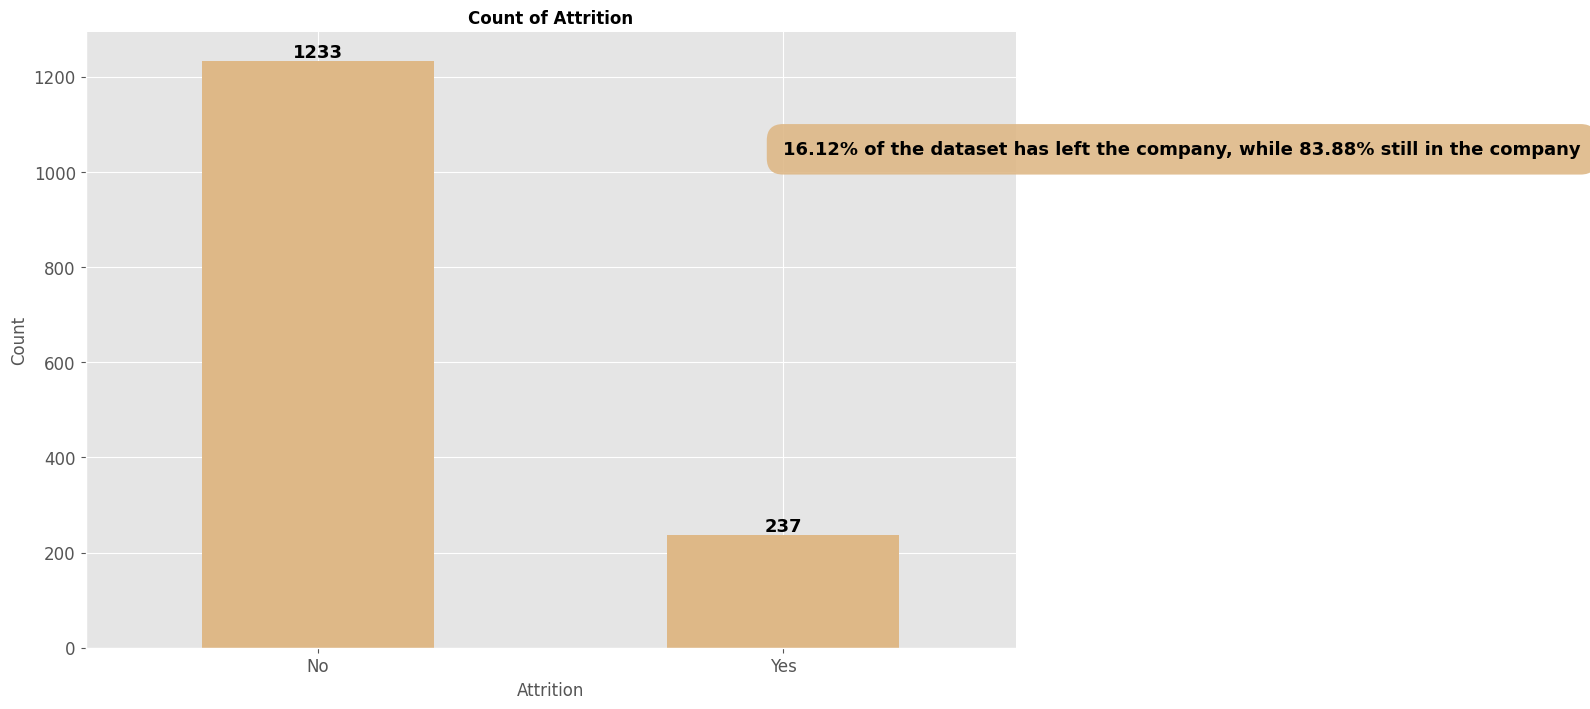

In [67]:
count_attrition = data['Attrition'].value_counts()
total_attrition = count_attrition.sum()

# count of attrition

fig, axes = plt.subplots(1,1)

bar = count_attrition.plot(kind='bar', ax=axes, color='burlywood')
bar.set_xticklabels(count_attrition.index, rotation=0)
bar.set(xlabel='Attrition', ylabel='Count')
plt.title('Count of Attrition', fontweight="black")
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

for i, v in enumerate(count_attrition):
    bar.text(i, v, str(v)
             , ha='center', va='bottom', fontsize=13, fontweight="black")

# percent of each value to put in the box

percent_yes = (count_attrition['Yes'] / total_attrition*100)
percent_no = (count_attrition['No'] / total_attrition*100)

bar.text(1.0,
         count_attrition[1]+800,
         f'{percent_yes:.2f}% of the dataset has left the company, while {percent_no:.2f}% still in the company',
         bbox={'facecolor': 'burlywood', 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=13,fontweight="black")

plt.show()


- As we could see, the attrition rate at IBM is 16.12%.
- According to insightglobal.com, every company should generally aim for an attrition rate of 10% or lower.
- Taking this into account, it's apparent that IBM's attrition rate is higher than 10%, indicating a negative situation.





### Next, let's delve into the key factors that can affect the attrition rate






In [68]:
# Creating a new dataframe only with "Attrition = Yes". It will be useful to create some plots ahead.

data_yes = data[data["Attrition"] == "Yes"]

### Attrition vs. Important categories related to attrition

- Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

Hypothesis: It is likely that the "Bad"/"Low" rating within each category will exhibit a higher attrition rate. This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. They are closely linked to satisfaction with the job, environment, interpersonal relationships, and the adequacy of work-life balance.

In [69]:
# Here we are going to plot 4 graphs

# First, let´s group the data

environmentsatisfact_attrition = data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack().reset_index()
job_satisf_attrition = data.groupby(['JobSatisfaction', 'Attrition']).size().unstack().reset_index()
rel_satisf_attrition = data.groupby(['RelationshipSatisfaction', 'Attrition']).size().unstack().reset_index()
worklife_balance_attrition = data.groupby(['WorkLifeBalance', 'Attrition']).size().unstack().reset_index()

# Creating percentage columns for attrition in each groupby

dataframes = [environmentsatisfact_attrition, job_satisf_attrition, rel_satisf_attrition, worklife_balance_attrition]

# Loop to add the percentage rate column in each dataset

for df in dataframes:
    df['Attrition Percent'] = ((df['Yes'] / (df['Yes'] + df['No'])) * 100).round(2)

# Creating a figure with 1 row and 4 col and choosing the fontsize por xaxis

fig = make_subplots(rows=1, cols=4)

font_size = 12

# First plot

fig.add_trace(go.Bar(x=environmentsatisfact_attrition['EnvironmentSatisfaction'],
                     y=environmentsatisfact_attrition['Attrition Percent'],
                     name='EnvironmentSatisfaction'), row=1, col=1)

fig.update_xaxes(title_text="Environment Satisfaction Level", row=1, col=1,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))

# Second plot

fig.add_trace(go.Bar(x=job_satisf_attrition['JobSatisfaction'],
                     y=job_satisf_attrition['Attrition Percent'],
                     name='JobSatisfaction'),row=1,col=2)

fig.update_xaxes(title_text="Job Satisfaction Level", row=1, col=2,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))


# Third Plot

fig.add_trace(go.Bar(x=rel_satisf_attrition['RelationshipSatisfaction'],
                     y=rel_satisf_attrition['Attrition Percent'],
                     name='RelationshipSatisfaction'),row=1,col=3)

fig.update_xaxes(title_text=" Relationship Satisfaction Level", row=1, col=3,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))


# Fourth plot

fig.add_trace(go.Bar(x=worklife_balance_attrition['WorkLifeBalance'],
                     y=worklife_balance_attrition['Attrition Percent'],
                     name='Work-LifeBalance'),row=1,col=4)

fig.update_xaxes(title_text="Work-Life Balance", row=1, col=4,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))


# I´ll just set one yaxis, because for every y axes we have "Attrition Percent"

fig.update_yaxes(title_text="Attrition Percent", row=1, col=1)

# Title

fig.update_layout(
    title_text='Attrition(%) x Environment, Job, Relationship and Work-Life Balance Satisfaction',
    barmode='stack',showlegend=False)

fig.show()

As evident from the data, the hypothesis holds true. The Attrition Percent is notably higher for individuals associated with "Bad" or "Low" values, indicating dissatisfaction with the analyzed attributes. For example, the attrition rate is significantly elevated for those dissatisfied with their work environment, at 25.35%. Similarly, low job satisfaction is accompanied by a 22.84% attrition rate, which is considerably higher than the other values. Additionally, we observe a 20.65% attrition rate for poor relationship satisfaction and a striking 31.25% attrition rate for poor work-life balance.

### Attrition x Financial categories of the dataset

- Monthly Income and PercentSalaryHike.

In [70]:
# Creating the figure

fig = make_subplots(rows=1, cols=2)

# First plot

box1 = px.box(data, x='Attrition', y='MonthlyIncome',
              color='Attrition', color_discrete_sequence=px.colors.qualitative.Set1)

fig.add_trace(box1.data[0], row=1, col=1)
fig.add_trace(box1.data[1], row=1, col=1)

fig.update_xaxes(title_text='Monthly Income', row=1, col=1)

# Second plot

box2 = px.box(data, x='Attrition', y='PercentSalaryHike',
                    color='Attrition', color_discrete_sequence=px.colors.qualitative.Set2)

fig.add_trace(box2.data[0], row=1, col=2)
fig.add_trace(box2.data[1], row=1, col=2)

fig.update_xaxes(title_text='Percent Salary Hike', row=1, col=2)


# Layout

fig.update_layout(title_text='Attrition vs Monthly Income and PercentSalaryHike', title_x=0.5,
                 showlegend=False)
fig.update_yaxes(title_text='Attrition', row=1, col=1)

# Show subplot

fig.show()

- As we can observe in the first plot, employees who remain in the company (Attrition = No) have higher salaries compared to those who left. Furthermore, the second boxplot shows that they also have a higher percentage of salary increase, which attests to their higher probability of salary growth.

- These metrics indicate that people who left received lower income, and this probably has a significant influence on attrition

### Attrition x Gender

<ipython-input-71-97b1baf4053c>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




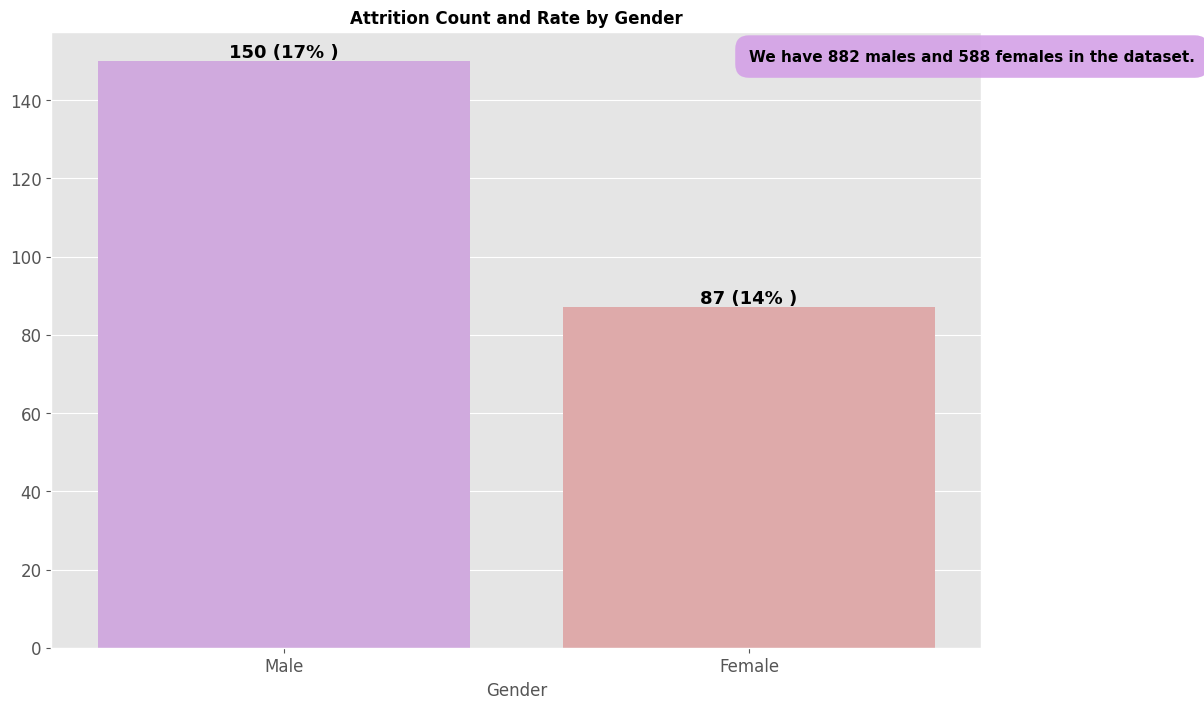

In [71]:
# Gender distribution

gender_count = data['Gender'].value_counts()

v1= gender_count
v2 = data_yes["Gender"].value_counts()

attrition_rate = np.floor((v2/v1)*100).values

plot_=sns.barplot(x=v2.index, y=v2.values,palette=["#D4A1E7","#E7A1A1"])

plt.title("Attrition Count and Rate by Gender",fontweight="black")

for index,value in enumerate(v2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=13,fontweight="black")

plot_.text(1.0,
         150,
         f'We have {v1["Male"]} males and {v1["Female"]} females in the dataset.',
         bbox={'facecolor': '#D4A1E7', 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=11,fontweight="black")

plt.show()


- As we can see, there are more males than females in the dataset. Because of that, they have a higher attrition rate.

- However, we can consider that the attrition rates for both genders are quite high, especially for males, with an attrition rate close to 20%.


### Attrition x Age

In [72]:
grouped_data = data.groupby(['Age', 'Attrition']).size().unstack(fill_value=0)

colors = {'Yes': 'rgb(255, 86, 86)', 'No': 'rgb(77, 157, 224)'}

fig = go.Figure()

for attrition in ['Yes', 'No']:
    fig.add_trace(go.Bar(
        x=grouped_data.index,
        y=grouped_data[attrition],
        name=attrition,
        marker_color=colors[attrition]))

fig.update_layout(
    title_text='Distribution of Attrition by Age',
    xaxis_title='Age',
    yaxis_title='Count',
    barmode='stack')

fig.show()

In [73]:
# Its also interesting to analyze the age range

num = [18, 30, 40, 50, 60]
agerange = ['18-29', '30-39', '40-49', '50-60']

data['Age Range'] = pd.cut(data['Age'], bins=num, labels=agerange)

age_range_group = data.groupby(['Age Range', 'Attrition']).size().unstack()

age_range_group['Attrition Rate'] = (age_range_group['Yes'] / (age_range_group['Yes'] + age_range_group['No']) *100).round(2)

age_range_group= age_range_group.reset_index()

# plotting

color_discrete_sequence=px.colors.sequential.Inferno

fig = px.bar(age_range_group, x='Age Range', y='Attrition Rate', color='Attrition Rate',
             color_discrete_sequence=color_discrete_sequence)

fig.update_layout(title='Attrition Rate per Age Group', xaxis_title='Age Range', yaxis_title='Attrition Rate (%)')

fig.show()


- Upon observation, a significant portion of employees falls within the age range of 30 to 40 years.

- Examining the second graph reveals a discernible trend: as age increases, the attrition rate diminishes. Notably, employees aged between 18 and 29 exhibit a substantial attrition rate of 25.4%, while those between 30 and 39 years display a considerably lower rate of 13.73%.

- This pattern implies that mature individuals tend to prioritize stability over change, in contrast to their younger peers who may be more inclined to explore alternative opportunities and take risks.

- Moreover, this distinction is particularly evident in the case of the youngest employees: half of those aged 18 opted to leave the company, and a majority of those aged 19 also decided to leave IBM.

### Attrition per distance from work

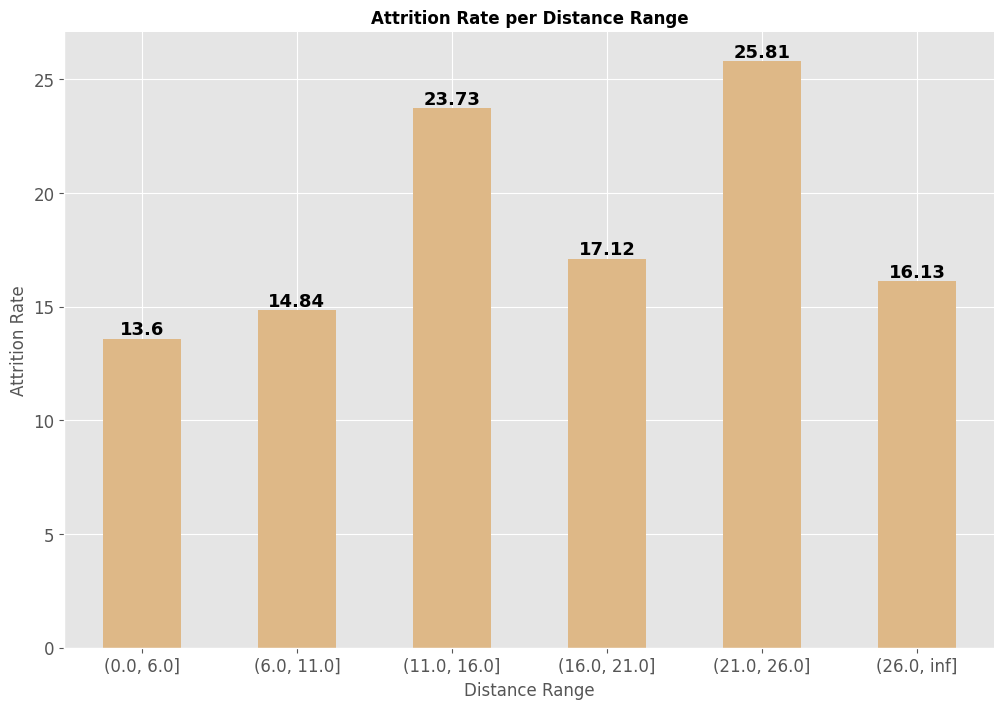

In [74]:
# creating distance ranges

dist_ranges = [(0, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
dist_label = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

data['DistanceRange'] = pd.cut(data['DistanceFromHome'], bins=[x[0] for x in dist_ranges] + [float('inf')])

attrition_distance = data.groupby(['DistanceRange', 'Attrition']).size().unstack()

# creating attrition rate on attrition_distance

attrition_distance['Attrition Rate'] = (attrition_distance['Yes'] /
                                        (attrition_distance['Yes'] + attrition_distance['No']) *100).round(2)

# visualizing

attrition_distance = attrition_distance.reset_index()

fig, axes = plt.subplots(1,1)

bar6 = attrition_distance['Attrition Rate'].plot(kind='bar', ax=axes, color='burlywood')
bar6.set_xticklabels(attrition_distance['DistanceRange'], rotation=0)  # Usar os rótulos das categorias
bar6.set(xlabel='Distance Range', ylabel='Attrition Rate')
plt.title('Attrition Rate per Distance Range', fontweight="black")
bar6.spines['top'].set_visible(False)
bar6.spines['right'].set_visible(False)

for x, y in enumerate(attrition_distance['Attrition Rate']):
    bar6.text(x, y, str(y), ha='center', va='bottom', fontsize=13, fontweight="black")

plt.show()

- Our observation reveals a relation between a lower attrition rate and the proximity of employees residences to the workplace. Conversely, the graph demonstrates a notable increase in attrition within the 21 to 26 range, possibly due to the greater distances involved. Moreover, it's interesting that the 11-16 range exhibits the second-highest attrition rate, hinting at additional influencing factors at play.

### Attrition per Business Travel

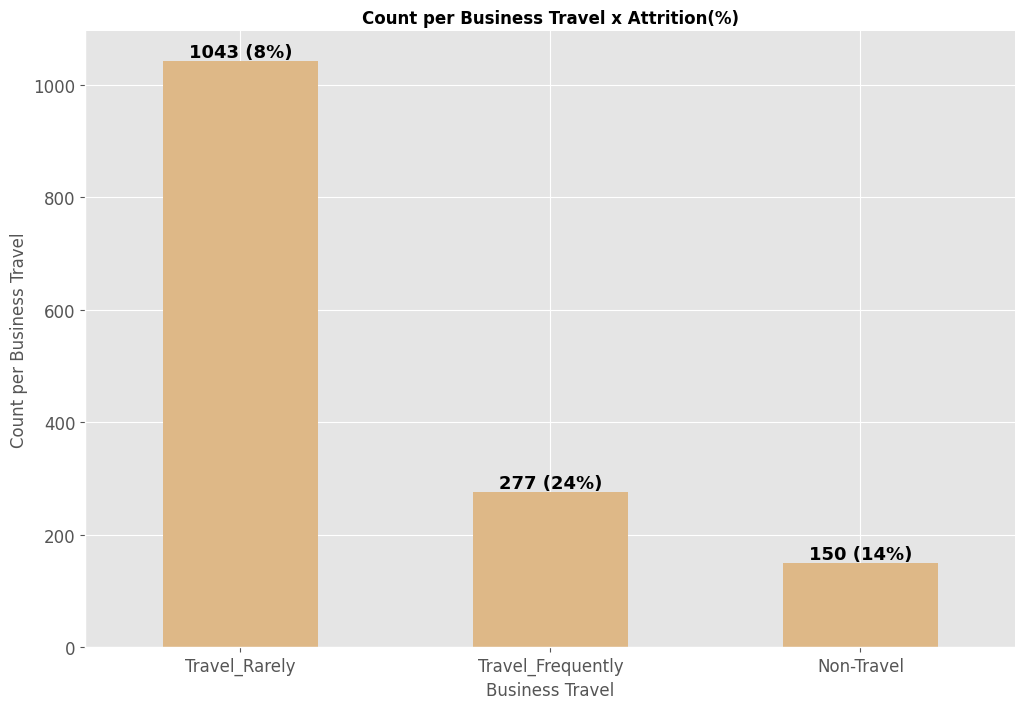

In [75]:
travel_count = data['BusinessTravel'].value_counts()
attrition_distance = data.groupby(['BusinessTravel', 'Attrition']).size().unstack()

attrition_distance_yes = attrition_distance['Yes']

v3 = travel_count
v4 = attrition_distance_yes

attrition_rate_distance = np.floor((v4 / v3) * 100).values

fig, axes = plt.subplots(1, 1)

bar6 = v3.plot(kind='bar', ax=axes, color='burlywood')
bar6.set_xticklabels(v3.index, rotation=0)
bar6.set(xlabel='Business Travel', ylabel='Count per Business Travel')
axes.set_title('Count per Business Travel x Attrition(%)', fontweight="black")
bar6.spines['top'].set_visible(False)
bar6.spines['right'].set_visible(False)

for r, p in enumerate(v3):
    plt.text(r, p, f"{int(p)} ({int(attrition_rate_distance[r])}%)", ha="center", va="bottom",
             size=13, fontweight="black")

plt.show()

##### It would be interesting to analyze the work-life balance of people who travel frequently. Maybe traveling too much can influence the balance.

In [76]:
# Business Travel x Work-Life Balance

# Group By

travel_balance = data.groupby(['BusinessTravel', 'WorkLifeBalance']).size().unstack().reset_index()

# Adding a percentage of Bad work balance

travel_balance['Bad Balance Rate'] = (travel_balance['Bad'] /
                                      (travel_balance['Best'] + travel_balance['Better'] +
                                       travel_balance['Good']) *100).round(2)

# Creating a pie to compare only the percentage for bad work - life balance

fig = px.bar(data_frame=travel_balance, x='BusinessTravel', y='Bad Balance Rate',
             title='Distribution of Bad Balance Rate by Business Travel Type',
             labels={'Bad Balance Rate': 'Percentage of Bad Balance Rate'})

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()


- As we observe, the majority of employees travel infrequently. Additionally, the attrition rate is notably higher among employees who travel frequently. This suggests that frequent travel might serve as an indicator that an individual is more likely to leave the company.

- In the second plot, we observe that individuals who travel frequently have a lower 'Bad' rate. This suggests that those who travel extensively do not seem to be significantly affected by their frequent travels in terms of work-life balance.

### Attrition per Department

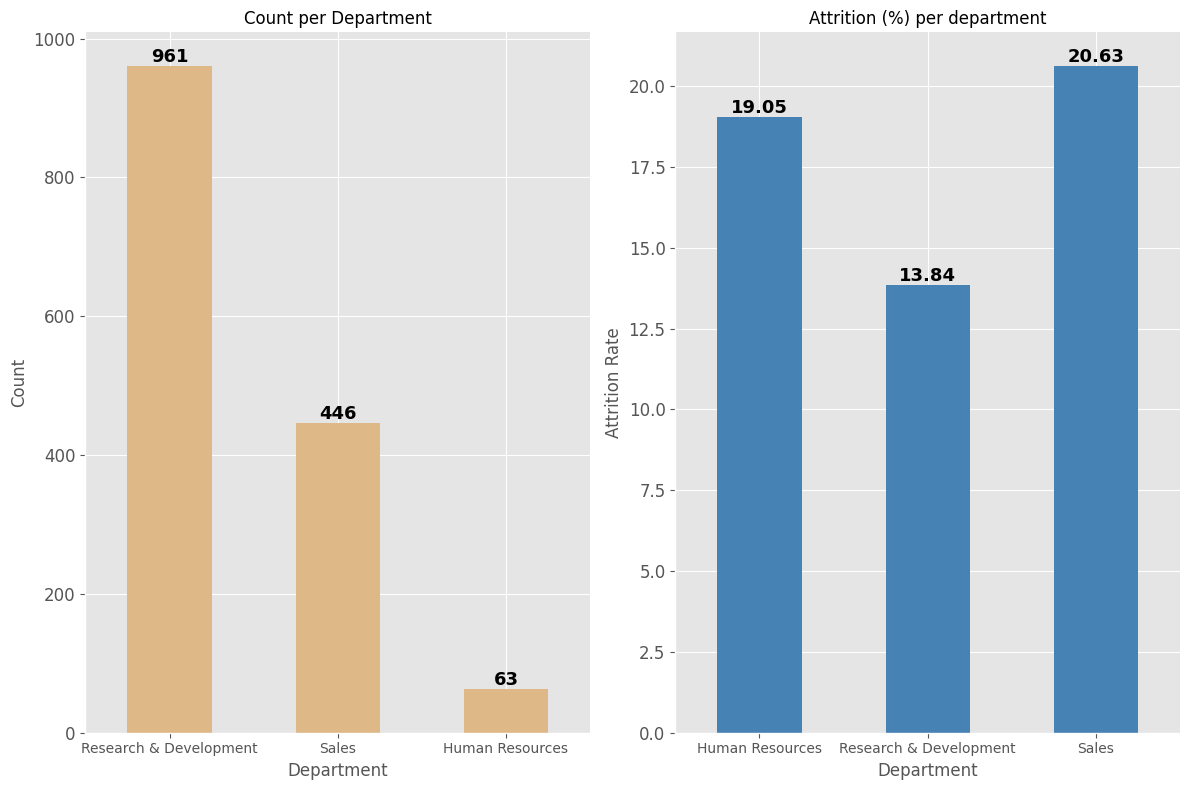

In [77]:
# firstly, let´s understand the count of employees per department

count_dep = data['Department'].value_counts()

fig, axes = plt.subplots(1,2)

bar1 = count_dep.plot(kind='bar', ax=axes[0], color='burlywood')
bar1.set_xticklabels(count_dep.index, rotation=0, fontsize=10)
bar1.set(xlabel='Department', ylabel='Count', title='Count per Department')
bar1.spines['top'].set_visible(False)
bar1.spines['right'].set_visible(False)

for e, f in enumerate(count_dep):
    bar1.text(e, f, str(f)
             , ha='center', va='bottom', fontsize=13, fontweight="black")

# secondly, let´s see the Department x Attrition

attrition_dep = data.groupby(['Department', 'Attrition']).size().unstack()

attrition_dep['Attrition Rate'] = (attrition_dep['Yes'] / (attrition_dep['Yes'] + attrition_dep['No']) *100).round(2)

bar2 = attrition_dep['Attrition Rate'].plot(kind='bar', ax=axes[1], color='SteelBlue')
bar2.set_xticklabels(attrition_dep.index, rotation=0, fontsize=10)
bar2.set(xlabel='Department', ylabel='Attrition Rate', title='Attrition (%) per department')
bar2.spines['top'].set_visible(False)
bar2.spines['right'].set_visible(False)

for p in bar2.patches:
    bar2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=13, fontweight="black")

plt.tight_layout()

plt.show()

- We can see that even though Research & Development makes up half of the employees, the Sales department has a relatively high attrition rate, almost reaching 21%. Additionally, Human Resources, despite having the lowest number of people in that department, showed a significant attrition rate.

##### Why there is such a huge attrition rate in Human Resources and Sales?

We´ll look into 5 categories: Monthly Income, EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction,
WorkLifeBalance, and Working Overtime.

In [78]:
# Department (Attrition = Yes) x Monthly Income

color_discrete_sequence=px.colors.qualitative.Dark24

fig = px.box(data_yes, x='Department', y='MonthlyIncome', color='Department', color_discrete_sequence=color_discrete_sequence)

fig.update_layout(title='Department (Attrition = Yes) vs Monthly Income', xaxis_title='Department', yaxis_title='Income')

fig.show()

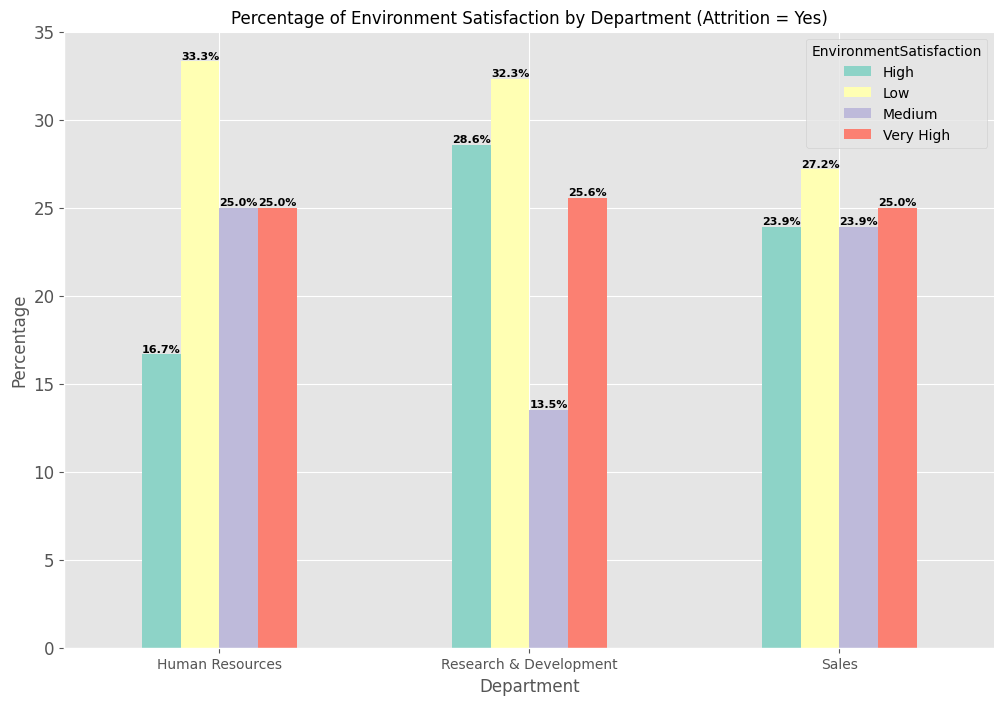

In [79]:
# Department x Environment Satisfaction

sns.set_palette("Set3")

# Grouping each department per environment satisfaction
satisfaction_dep = data_yes.groupby(['Department', 'EnvironmentSatisfaction']).size().unstack()

# Calculating the percentage for each department
satisfaction_percent = satisfaction_dep.divide(satisfaction_dep.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 1)

# Creating barplot
bar7 = satisfaction_percent.plot(kind='bar', ax=axes)
bar7.set_xticklabels(satisfaction_percent.index, rotation=0, fontsize=10)
bar7.set(xlabel='Department', ylabel='Percentage',
         title='Percentage of Environment Satisfaction by Department (Attrition = Yes)')
bar7.spines['top'].set_visible(False)
bar7.spines['right'].set_visible(False)

# Adding percentages on each bar
for container in bar7.containers:
    axes.bar_label(container, fmt='%.1f%%', fontsize=8, fontweight='bold', label_type='edge')

plt.show()

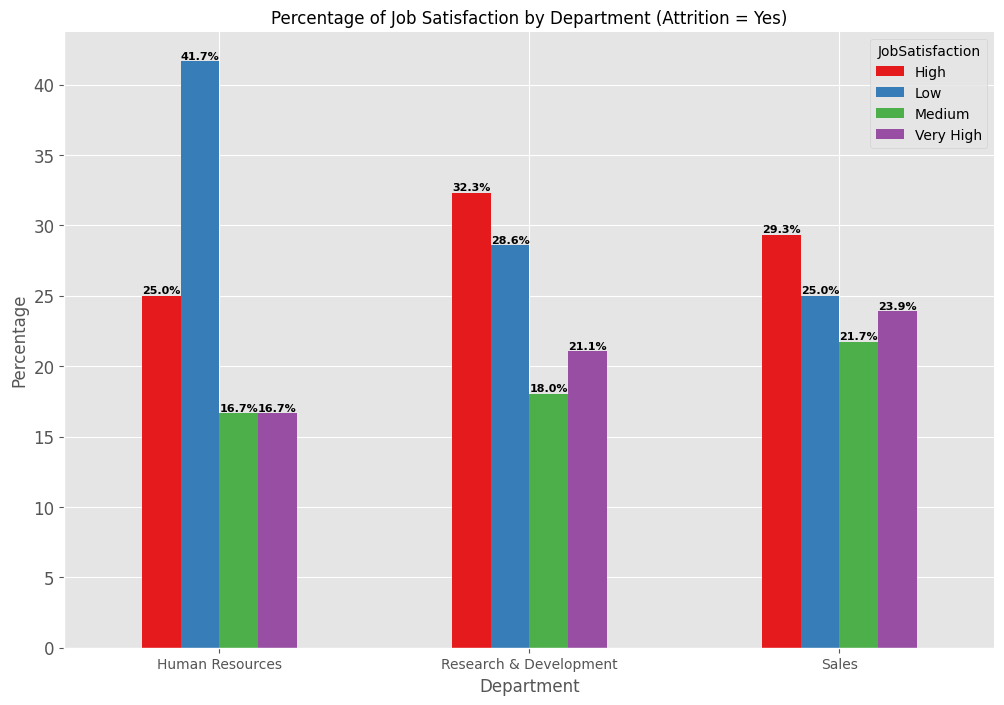

In [80]:
# Department x Job Satisfaction

sns.set_palette("Set1")

jobsatisfaction_dep = data_yes.groupby(['Department', 'JobSatisfaction']).size().unstack()

# Calculating the percentage for each department
jobsatisfaction_percent = jobsatisfaction_dep.divide(jobsatisfaction_dep.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 1)

# Creating barplot
bar8 = jobsatisfaction_percent.plot(kind='bar', ax=axes)
bar8.set_xticklabels(jobsatisfaction_percent.index, rotation=0, fontsize=10)
bar8.set(xlabel='Department', ylabel='Percentage', title='Percentage of Job Satisfaction by Department (Attrition = Yes)')
bar8.spines['top'].set_visible(False)
bar8.spines['right'].set_visible(False)

# Adding percentages on each bar
for containe2 in bar8.containers:
    axes.bar_label(containe2, fmt='%.1f%%', fontsize=8, fontweight='bold', label_type='edge')

plt.show()

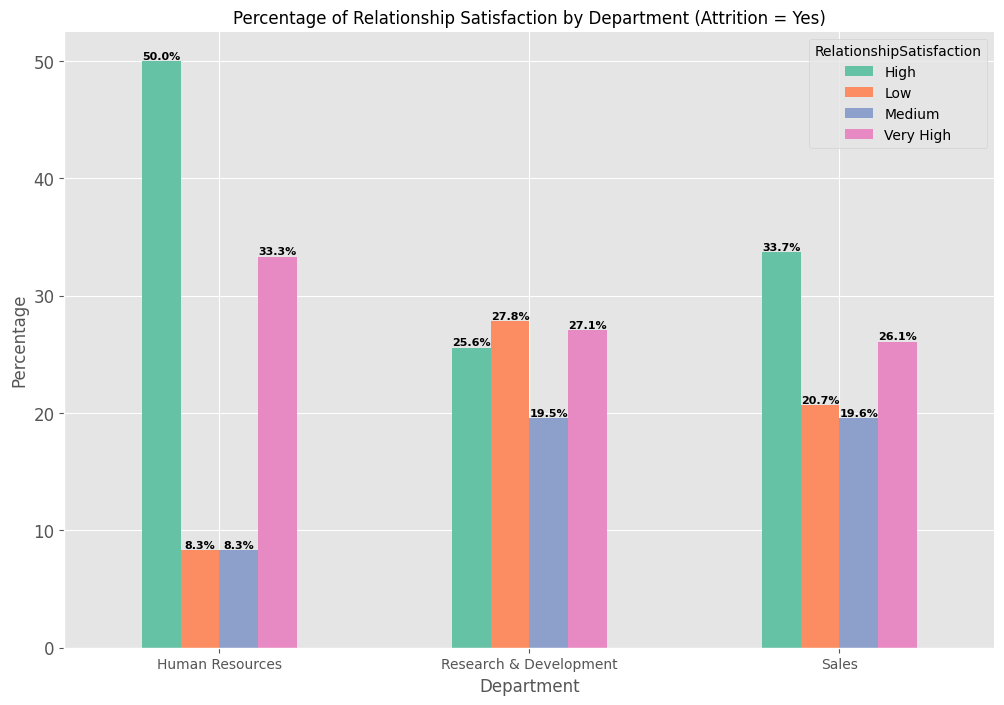

In [81]:
# Department x RelationshipSatisfaction

sns.set_palette("Set2")

# Grouping each department per environment satisfaction
relationsatisfaction_dep = data_yes.groupby(['Department', 'RelationshipSatisfaction']).size().unstack()

# Calculating the percentage for each department
relsatisfaction_percent = relationsatisfaction_dep.divide(satisfaction_dep.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 1)

# Creating barplot
bar9 = relsatisfaction_percent.plot(kind='bar', ax=axes)
bar9.set_xticklabels(relsatisfaction_percent.index, rotation=0, fontsize=10)
bar9.set(xlabel='Department', ylabel='Percentage',
         title='Percentage of Relationship Satisfaction by Department (Attrition = Yes)')
bar9.spines['top'].set_visible(False)
bar9.spines['right'].set_visible(False)

# Adding percentages on each bar
for container in bar9.containers:
    axes.bar_label(container, fmt='%.1f%%', fontsize=8, fontweight='bold', label_type='edge')

plt.show()

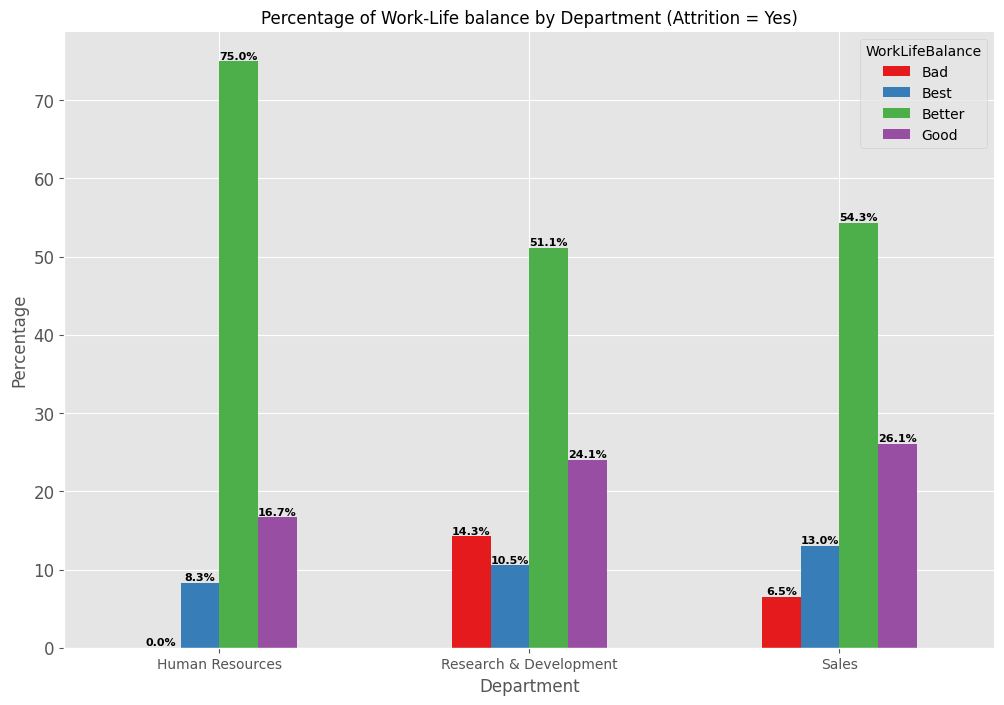

In [82]:
# Department x WorkLifeBalance

sns.set_palette("Set1")

# Grouping each department per environment satisfaction
worklifebalance_dep = data_yes.groupby(['Department', 'WorkLifeBalance']).size().unstack()

# Calculating the percentage for each department
worklifebalance_percent = worklifebalance_dep.divide(satisfaction_dep.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 1)

# Creating barplot
bar10 = worklifebalance_percent.plot(kind='bar', ax=axes)
bar10.set_xticklabels(worklifebalance_percent.index, rotation=0, fontsize=10)
bar10.set(xlabel='Department', ylabel='Percentage', title='Percentage of Work-Life balance by Department (Attrition = Yes)')
bar10.spines['top'].set_visible(False)
bar10.spines['right'].set_visible(False)

# Adding percentages on each bar
for container4 in bar10.containers:
    axes.bar_label(container4, fmt='%.1f%%', fontsize=8, fontweight='bold', label_type='edge')

plt.show()

In [83]:
# Department x Working overtime

department_overtime = data_yes.groupby(['Department', 'OverTime']).size().unstack()

# Convert to long format for Plotly
department_overtime_conv = department_overtime.reset_index().melt(id_vars='Department', var_name='Overtime', value_name='Count')

# Create a bar plot using Plotly
fig = px.bar(department_overtime_conv, x='Department', y='Count', color='Overtime',
             title="Department (Attrition = Yes) x Working Overtime", barmode='group')

# Customize the layout
fig.update_layout(xaxis_title='Department', yaxis_title='Count')

# Show the Plotly figure
fig.show()

##### Possible reasons for the highest attrition rate in Human Resources and Sales:

> #### Human Resources:
- We found in the boxplot that employees from the Human Resources department who left the company had the lowest income compared to other departments. Additionally, it was observed that 33.3% were dissatisfied with the work environment, and 41.7% expressed dissatisfaction with their job.

- Also, we can conclude that work-life balance, relationship satisfaction, and overtime work appear to have limited influence. Our findings indicate that employees in this department generally report high levels of satisfaction with their work relationships and work-life balance. Additionally, it's notable that a significant portion of the department's employees did not work overtime. These factors suggest that within this specific group of employees, attrition may not be significantly influenced by these variables.

- Due to these dynamics, there is a significant likelihood that the increased attrition rate in this department is correlated with income, as well as dissatisfaction with the work environment and the job itself."

> #### Sales:

- After analyzing each category, we found that individuals who left IBM and were part of the Sales department had higher incomes in comparison with other departments. Additionally, the majority of respondents reported satisfaction with their jobs, relationships, and work-life balance. Consequently, probably, these factors are not strongly associated with attrition.

- It's worth noting that 27.2% of respondents expressed dissatisfaction with the work environment. For these individuals, this factor likely played a significant role in their decision to leave. However, 25% reported very high satisfaction, and 23.9% reported high satisfaction with their work environment. This suggests that more than half of Sales department employees were satisfied, leading to the conclusion that the work environment may not be the primary driver of attrition.

- However, when we examine the final plot, it becomes evident that a significant number of individuals worked overtime, potentially making it an influential factor in attrition.

### Attrition per Job Type and Job Role

In [84]:
# Attrition per Job Level and Job Role

# First plot

job_level_group = data.groupby(['JobLevel', 'Attrition']).size().unstack(fill_value=0)

colors2 = {'Yes': 'rgb(255, 86, 86)', 'No': 'rgb(77, 157, 224)'}

fig = make_subplots(rows=1, cols=2)

for attrition2 in ['Yes', 'No']:
    fig.add_trace(go.Bar(
        x=job_level_group.index,
        y=job_level_group[attrition2],
        name=attrition2,
        marker_color=colors2[attrition2]), row=1, col=1)

# Second plot

job_role_group = data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

for attrition3 in ['Yes', 'No']:
    fig.add_trace(go.Bar(x=job_role_group.index,
                        y=job_role_group[attrition3],
                        name=attrition3,
                        marker_color=colors2[attrition3]), row=1, col=2)

fig.update_layout(
    title_text='Count per Job Level, Job Role, and Education Field x Attrition',
    barmode='stack')

fig.update_traces(selector=dict(type='bar', row=1, col=2))

fig.show()

- It's evident that we have a higher attrition rate among employees at the Entry and Mid-levels, while the percentage for individuals at the Junior, Senior, and Executive levels is notably smaller.

- In the second graph, it's apparent that the attrition count is notably higher among Laboratory Technicians, Sales Executives, Research Scientists, and Sales Representatives. However, our primary focus for analysis will be on job levels.







#### This higher percentage of attrition in entry and mid levels can be related with the monthly income. Let´s see.

In [85]:
color_discrete_sequence=px.colors.qualitative.Dark24

fig = px.box(data_yes, x='JobLevel', y='MonthlyIncome', color='JobLevel', color_discrete_sequence=color_discrete_sequence)

fig.update_layout(title='Job Role x Monthly Income', xaxis_title='JobRole', yaxis_title='Income')

fig.show()

In [86]:
fig = px.box(data_yes, x='JobLevel', y='PercentSalaryHike', color='JobLevel', color_discrete_sequence=color_discrete_sequence)

fig.update_layout(title='Job Level x PercentSalaryHike', xaxis_title='JobRole', yaxis_title='PercentSalaryHike')

fig.show()

- While employees at the entry-level typically earn lower monthly incomes, which is expected given their beginner status, it's noteworthy that they experience a significant percentage increase in their salaries. This suggests a strong expectation of salary growth among employees at this level. Considering this, it's possible that the higher attrition at the entry-level is not primarily related to salaries.

- On the other hand, we observe that mid-level employees have a smaller percentage salary hike, which may be an influential factor in their higher attrition rate.

#### Maybe it is directly related with dissatisfaction with the environment or job.

In [87]:
# First, let´s group the data

environmentsatisfact_jobrole = data.groupby(['JobLevel', 'EnvironmentSatisfaction']).size().unstack().reset_index()
job_satisf_jobrole = data.groupby(['JobLevel','JobSatisfaction']).size().unstack().reset_index()

dataframes2 = [environmentsatisfact_jobrole,job_satisf_jobrole]


# Creating a percentage for "Low"
for df2 in dataframes2:
    df2['Low Percent'] = ((df2['Low'] / (df2['Low'] + df2['Medium'] + df2['High'] + df2['Very High'])) * 100).round(2)

# Creating a figure with 1 row and 2 col and choosing the fontsize por xaxis

fig = make_subplots(rows=1, cols=2)

font_size = 12

# First plot

fig.add_trace(go.Bar(x=environmentsatisfact_jobrole['JobLevel'],
                     y=environmentsatisfact_jobrole['Low Percent'],
                     name='Low percentage of Environment Satisfaction'), row=1, col=1)

fig.update_xaxes(title_text="Environment Satisfaction Level", row=1, col=1,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))

# Second plot

fig.add_trace(go.Bar(x=job_satisf_jobrole['JobLevel'],
                     y=job_satisf_jobrole['Low Percent'],
                     name='Low percentage of Job Satisfaction'),row=1,col=2)

fig.update_xaxes(title_text="Job Satisfaction Level", row=1, col=2,
                 title_font=dict(size=font_size), tickfont=dict(size=font_size))

fig.update_layout(title='Job Level x Low percentage of Satisfaction with the Environment and Job')

fig.update_yaxes(title_text='Low Percentage')


fig.show()

- As we can see, the hypothesis holds for mid-level employees: they exhibit the second-highest level of dissatisfaction with their work environment and a significantly higher percentage of job dissatisfaction. These two factors probably are influencing the attrition rate for this level.

- Conversely, the Entry level does not show dissatisfaction with their work environment. However, they exhibit the third-highest level of job dissatisfaction, which could be a driving factor for their departure from the company."


#### As we observed, younger employees exhibit a considerably higher attrition rate. They likely belong to entry-level positions, often associated with interns. To address our questions regarding the high attrition rate at this level, let's examine the relationship between age and entry-level positions.

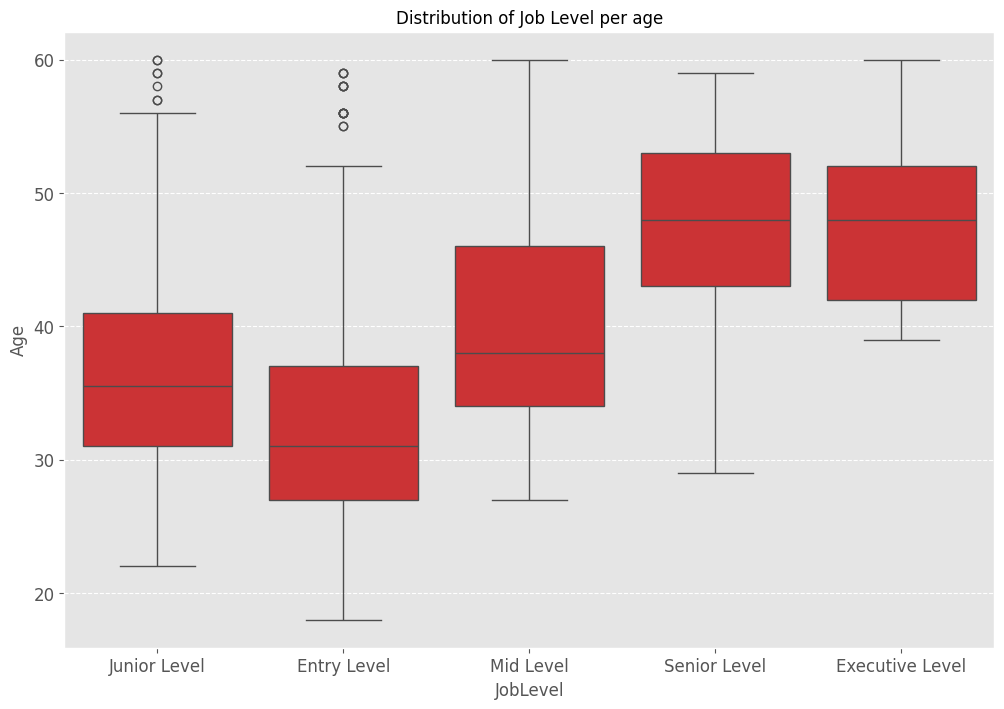

In [88]:
sns.boxplot(data=data, y='Age', x='JobLevel')

plt.title("Distribution of Job Level per age")
plt.grid(True, axis='y', linestyle='--', alpha=1.0)

plt.show()

- Individuals at the entry-level are typically the youngest employees. This observation helps clarify the higher attrition rate among entry-level positions. This dynamic is closely related to age.

### Attrition per Education and Education Field

In [89]:
#First plot

fig = make_subplots(rows=1, cols=2)

education_group = data.groupby(['Education', 'Attrition']).size().unstack(fill_value=0)

for attrition4 in ['Yes', 'No']:
    fig.add_trace(go.Bar(x=education_group.index,
                        y=education_group[attrition4],
                        name=attrition4,
                        marker_color=colors2[attrition4]), row=1, col=1)

#Second plot

educationfield_group = data.groupby(['EducationField', 'Attrition']).size().unstack(fill_value=0)

for attrition5 in ['Yes', 'No']:
    fig.add_trace(go.Bar(x=educationfield_group.index,
                        y=educationfield_group[attrition5],
                        name=attrition5,
                        marker_color=colors2[attrition5]), row=1, col=2)
# Style

fig.update_layout(
    title_text='Education Field, and Education Level x Attrition',
    barmode='stack')

fig.update_traces(selector=dict(type='bar', row=1, col=2))

fig.show()

-  In the first graph, we observe that the majority of employees who left the company held Bachelor's degrees, followed by those with Master's and College degrees.

- Upon closer examination of the second graph, it becomes apparent that the fields of Life Sciences and Medical Education had the highest attrition rates.

### Attrition per YearsInCurrentRole,	YearsSinceLastPromotion, and YearsWithCurrManager

In [90]:
# Creating year ranges

bin_edges = [0, 5, 10, 20, 50]
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]
data_yes = data[data["Attrition"] == "Yes"]

# Creating columns for each range

data["YearsInCurrentRoleRange"] = pd.cut(data['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)
data["YearLastPromotionRange"] = pd.cut(data['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)
data["CurrManagerRange"] = pd.cut(data["YearsWithCurrManager"], bins=bin_edges, labels=bin_labels)

# Group by
year_currentrole = data.groupby(['YearsInCurrentRoleRange','Attrition']).size().unstack().reset_index()
year_lastpromotion = data.groupby(['YearLastPromotionRange', 'Attrition']).size().unstack().reset_index()
year_current_manager = data.groupby(['CurrManagerRange', 'Attrition']).size().unstack().reset_index()

# Creating Attrition rate

dataframes2 = [year_currentrole,year_lastpromotion,year_current_manager]

for df2 in dataframes2:
    df2['Attrition Rate'] = ((df2['Yes']) / (df2['Yes']+df2['No'])*100).round(2)

# Creating subplots

fig = make_subplots(rows=1, cols=3)

# Plot 1

fig.add_trace(go.Bar(x=year_currentrole['YearsInCurrentRoleRange'],
                     y=year_currentrole['Attrition Rate'], name='YearsInCurrentRoleRange'),
             row=1, col=1)

# Plot 2

fig.add_trace(go.Bar(x=year_lastpromotion['YearLastPromotionRange'],
                     y=year_lastpromotion['Attrition Rate'], name='YearLastPromotionRange'), row=1, col=2)

# Plot 3

fig.add_trace(go.Bar(x=year_current_manager['CurrManagerRange'],
                     y=year_current_manager['Attrition Rate'], name='CurrManagerRange'), row=1, col=3)

# Layout

fig.update_layout(title='Attrition Rate vs Years in current role, years Since Last Promotion, And Years with Current Manager')

- Employees who have been in their current role for less than one year to five years are more likely to leave the company. This suggests that there might be a higher turnover among employees in their early years with the company, possibly due to factors such as exploring new possibilities in their career or dissatisfaction.

- Furthermore, employees who remain in the same job role for 5 to 10 years also exhibit a higher probability of leaving. However, those who stay in the same role for 10 to 20 years have a lower attrition rate. This pattern implies that long-term employees may prioritize stability over seeking new experiences or opportunities.

- Additionally, it's noteworthy that the attrition rate is higher for employees who have had the same manager for 0 to 5 years. This observation may be linked to the number of years an employee has been in their current role, indicating potential influences of leadership and career stage on attrition.